In [138]:
import pickle
try:
    with open('results.pkl', 'rb') as f:
        data = pickle.load(f)
    print(data)
except FileNotFoundError:
    print(f"File not found: 'results.pkl'")

{5: {'rust': [    CPU_FREQUENCY_7  CPU_USAGE_5    TOTAL_SWAP  TOTAL_MEMORY   USED_MEMORY  \
0             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
1             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
2             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
3             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
4             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
5             611.0    22.857143  2.078014e+10  1.648549e+10  9.605165e+09   
6             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
7             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
8             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
9             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
10            611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
11            611.0     0.000000  2.078014e+10  1.

In [ ]:
import pandas as pd
%pip install seaborn
import seaborn as sns
%pip install matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore
import numpy as np


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
dict_keys([5, 35])
<class 'dict'>
{'rust': [    CPU_FREQUENCY_7  CPU_USAGE_5    TOTAL_SWAP  TOTAL_MEMORY   USED_MEMORY  \
0             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
1             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
2             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
3             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
4             611.0    22.857143  2.078014e+10  1.648549e+10  9.604927e+09   
5             611.0    22.857143  2.078014e+10  1.648549e+10  9.605165e+09   
6             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
7             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
8             611.0     0.000000  2.078014e+10  1.648549e+10  9.605165e+09   
9             611.0     0.000000

In [139]:
data = pd.read_pickle("results.pkl")
print(data.keys())

dict_keys([5, 35])


In [ ]:
split_dfs = {}

for fib in data:  # 5, 35
    for language in data[fib]:  # rust, cpp, nonservice
        summary_rows = []
        for df in data[fib][language]: #each experiment
            if "PACKAGE_ENERGY (J)" in df.columns:
                energy = df["PACKAGE_ENERGY (J)"].iloc[-1] - df["PACKAGE_ENERGY (J)"].iloc[0]
                summary_rows.append({
                    "PACKAGE ENERGY (J)": energy,
                    "tool": language,
                    "fib": fib
                })
            

        summary_df = pd.DataFrame(summary_rows)
        split_dfs[f"{language}_{fib}"] = summary_df

rust_5 = split_dfs["rust_5"]
rust_35 = split_dfs["rust_35"]
cpp_5 = split_dfs["cpp_5"]
cpp_35 = split_dfs["cpp_35"]
nonservice_5 = split_dfs["nonservice_5"]
nonservice_35 = split_dfs["nonservice_35"]

   PACKAGE ENERGY (J)  tool  fib
0            1.655457  rust    5


In [143]:
_, p_rust_5 = shapiro(rust_5['PACKAGE ENERGY (J)'])
_, p_rust_35 = shapiro(rust_35['PACKAGE ENERGY (J)'])
_, p_cpp_5 = shapiro(cpp_5['PACKAGE ENERGY (J)'])
_, p_cpp_35 = shapiro(cpp_35['PACKAGE ENERGY (J)'])
_, p_nonservice_5 = shapiro(nonservice_5['PACKAGE ENERGY (J)'])
_, p_nonservice_35 = shapiro(nonservice_35['PACKAGE ENERGY (J)'])
print("P-value for Rust with Fib(5): ", p_rust_5, "Normal distribution" if p_rust_5 > 0.05 else "Not normal distribution")
print("P-value for Rust with Fib(35):", p_rust_35, "Normal distribution" if p_rust_35 > 0.05 else "Not normal distribution")
print("P-value for C++ with Fib(5): ", p_cpp_5, "Normal distribution" if p_cpp_5 > 0.05 else "Not normal distribution")
print("P-value for C++ with Fib(35):", p_cpp_35, "Normal distribution" if p_cpp_35 > 0.05 else "Not normal distribution")
print("P-value for bash EnergiBridge with Fib(5): ", p_nonservice_5, "Normal distribution" if p_nonservice_5 > 0.05 else "Not normal distribution")
print("P-value for bash EnergiBridge with Fib(35):", p_nonservice_35, "Normal distribution" if p_nonservice_35 > 0.05 else "Not normal distribution")



P-value for Rust with Fib(5):  nan Not normal distribution
P-value for Rust with Fib(35): nan Not normal distribution
P-value for C++ with Fib(5):  nan Not normal distribution
P-value for C++ with Fib(35): nan Not normal distribution
P-value for bash EnergiBridge with Fib(5):  nan Not normal distribution
P-value for bash EnergiBridge with Fib(35): nan Not normal distribution


C:\Users\vmmv1\AppData\Local\Temp\ipykernel_31760\977908686.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_rust_5 = shapiro(rust_5['PACKAGE ENERGY (J)'])
C:\Users\vmmv1\AppData\Local\Temp\ipykernel_31760\977908686.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_rust_35 = shapiro(rust_35['PACKAGE ENERGY (J)'])
C:\Users\vmmv1\AppData\Local\Temp\ipykernel_31760\977908686.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_cpp_5 = shapiro(cpp_5['PACKAGE ENERGY (J)'])
C:\Users\vmmv1\AppData\Local\Temp\ipykernel_31760\977908686.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements

In [66]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=df_5)
plt.title("Energy Consumption by Measurement Tool for Fib(5)")
plt.xlabel("Measurement tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `PACKAGE ENERGY (J)` for `y`. An entry with this name does not appear in `data`.

<Figure size 700x600 with 0 Axes>

C:\Users\vmmv1\AppData\Local\Temp\ipykernel_31760\2204779864.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


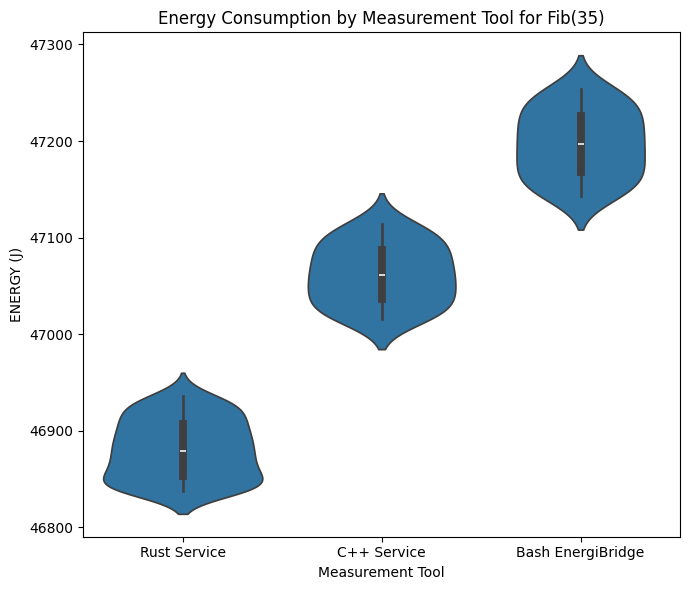

In [37]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE_ENERGY (J)", data=df_35)
plt.title("Energy Consumption by Measurement Tool for Fib(35)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.tight_layout()
plt.show()